In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

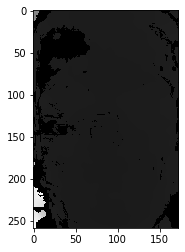

In [2]:
ok_depth = cv2.imread('depth_roi_data/depth_roi.png', cv2.IMREAD_ANYDEPTH).astype(np.uint16)
plt.imshow(ok_depth, cmap='gray')

(259, 173)
17
25


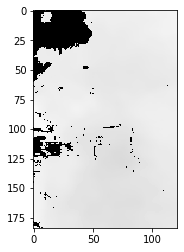

In [3]:
# Make a smaller roi around the vital parts
print(ok_depth.shape)
h2w = ok_depth.shape[0] / ok_depth.shape[1]

dx = int(0.2 * ok_depth.shape[1]) // 2
dy = int(h2w * dx)

print(dx)
print(dy)

tl_x = dx
tl_y = dy

br_x = ok_depth.shape[1] - 2 * dx
br_y = ok_depth.shape[0] - 2 * dy

depth_roi = ok_depth[tl_y : br_y, tl_x : br_x].astype(np.uint16)

plt.imshow(depth_roi, cmap='gray')

In [4]:
def compute_hist(img):
    bins = np.zeros(2**16)
    rows = img.shape[0]
    cols = img.shape[1]
    for row in range(0, rows):
        for col in range(0, cols):
            bins[img[row][col]] += 1
    return np.array(bins)

def smooth_out(hist, window_size=10):
    kernel = np.ones(shape=(2 * window_size))
    for i in range(0, hist.shape[0]):
        summation = 0.0
        count = 0
        for j in range(-window_size, window_size):
            idx = i + j
            if idx < 0 or idx > hist.shape[0] - window_size:
                continue
            summation += kernel[j] * hist[i + j]
            count += 1
        hist[i] = summation // count
        
    return hist

In [5]:
hist = compute_hist(depth_roi)
hist = smooth_out(hist)

print('Total of pixels: ', depth_roi.shape[0] * depth_roi.shape[1])

print('Number of zeros: %i' % hist[0])
print('Number of non-zeros: %i' % np.sum(hist[1:]))

print('Noise %: ', 100 * hist[0] / ( hist[0] + np.sum(hist[1:])))

Total of pixels:  22448
Number of zeros: 211
Number of non-zeros: 20498
Noise %:  1.018880679897629


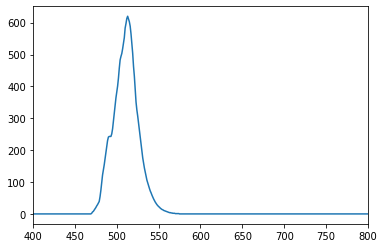

In [6]:
plt.xlim(400, 800)
plt.plot(hist)